In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [96]:
df = pd.read_csv('debug_data.csv',index_col=False)

In [172]:
xA = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloABeamPositionx.csv')
yA = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloABeamPositiony.csv')
xC = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloCBeamPositionx.csv')
yC = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloCBeamPositiony.csv')
zA = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloABeamPositionz.csv')
zC = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloCBeamPositionz.csv')
x = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloBeamPositionx.csv')
y = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloBeamPositiony.csv')
z = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_vdm_2024/input_data/VdM24_velomonitoring/VeloBeamPositionz.csv')
xA_LSC = pd.read_csv('vdm2024_plume_jump.csv',index_col=False) # VELO_LSC

In [173]:
xA['TS'] = pd.to_datetime(xA["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#xA['TS'] = xA['TS'] - pd.Timedelta('2 hours')
xA["TS"] = xA["TS"].dt.round("s")
xA.set_index('TS', inplace=True)
#xA = xA.between_time("13:24:24","13:27")
xA.reset_index(inplace=True)
yA['TS'] = pd.to_datetime(yA["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#yA['TS'] = yA['TS'] - pd.Timedelta('2 hours')
yA["TS"] = yA["TS"].dt.round("s")
yA.set_index('TS', inplace=True)
#yA = yA.between_time("13:28:12","13:30:30")
yA.reset_index(inplace=True)
zA['TS'] = pd.to_datetime(zA["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#zA['TS'] = zA['TS'] - pd.Timedelta('2 hours')
zA["TS"] = zA["TS"].dt.round("s")
zA.set_index('TS', inplace=True)
xC['TS'] = pd.to_datetime(xC["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#xC['TS'] = xC['TS'] - pd.Timedelta('2 hours')
xC["TS"] = xC["TS"].dt.round("s")
xC.set_index('TS', inplace=True)
#xC = xC.between_time("13:24:24","13:27")
xA.reset_index(inplace=True)
yC['TS'] = pd.to_datetime(yC["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#yC['TS'] = yC['TS'] - pd.Timedelta('2 hours')
yC["TS"] = yC["TS"].dt.round("s")
yC.set_index('TS', inplace=True)
#yC = yC.between_time("13:28:12","13:30:30")
yC.reset_index(inplace=True)
zC['TS'] = pd.to_datetime(zC["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#zC['TS'] = zC['TS'] - pd.Timedelta('2 hours')
zC["TS"] = zC["TS"].dt.round("s")
zC.set_index('TS', inplace=True)
xA_LSC['TS'] = pd.to_datetime(xA_LSC["TS"])
#xA_LSC['TS'] = xA_LSC['TS'] - pd.Timedelta('2 hours')
xA_LSC["TS"] = xA_LSC["TS"].dt.round("s")
xA_LSC.set_index('TS', inplace=True)
xA_LSC.reset_index(inplace=True)

x['TS'] = pd.to_datetime(x["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#x['TS'] = x['TS'] - pd.Timedelta('2 hours')
x["TS"] = x["TS"].dt.round("s")
x.set_index('TS', inplace=True)
#x = x.between_time("13:24:24","13:27")
x.reset_index(inplace=True)
y['TS'] = pd.to_datetime(y["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#y['TS'] = y['TS'] - pd.Timedelta('2 hours')
y["TS"] = y["TS"].dt.round("s")
y.set_index('TS', inplace=True)
#y = y.between_time("13:28:12","13:30:30")
y.reset_index(inplace=True)
z['TS'] = pd.to_datetime(z["TS"], format='%Y-%m-%d %H:%M:%S.%f')
#z['TS'] = z['TS'] - pd.Timedelta('2 hours')
z["TS"] = z["TS"].dt.round("s")
z.set_index('TS', inplace=True)


In [174]:
VeloAx = pd.merge(xA, xA_LSC, on='TS', how='inner')
VeloAy = pd.merge(yA, xA_LSC, on='TS', how='inner')
VeloAz = pd.merge(zA, xA_LSC, on='TS', how='inner')
VeloCx = pd.merge(xC, xA_LSC, on='TS', how='inner')
VeloCy = pd.merge(yC, xA_LSC, on='TS', how='inner')
VeloCz = pd.merge(zC, xA_LSC, on='TS', how='inner')

x_merge = pd.merge(x, xA_LSC, on='TS', how='inner')
y_merge = pd.merge(y, xA_LSC, on='TS', how='inner')
z_merge = pd.merge(z, xA_LSC, on='TS', how='inner')

In [175]:
VeloAx['TS'] = pd.to_datetime(VeloAx["TS"], format='%Y-%m-%d %H:%M:%S')
VeloAy['TS'] = pd.to_datetime(VeloAy["TS"], format='%Y-%m-%d %H:%M:%S')
VeloAz['TS'] = pd.to_datetime(VeloAz["TS"], format='%Y-%m-%d %H:%M:%S')
VeloCx['TS'] = pd.to_datetime(VeloCx["TS"], format='%Y-%m-%d %H:%M:%S')
VeloCy['TS'] = pd.to_datetime(VeloCy["TS"], format='%Y-%m-%d %H:%M:%S')
VeloCz['TS'] = pd.to_datetime(VeloCz["TS"], format='%Y-%m-%d %H:%M:%S')
x_merge['TS'] = pd.to_datetime(x_merge["TS"], format='%Y-%m-%d %H:%M:%S')
y_merge['TS'] = pd.to_datetime(y_merge["TS"], format='%Y-%m-%d %H:%M:%S')
z_merge['TS'] = pd.to_datetime(z_merge["TS"], format='%Y-%m-%d %H:%M:%S')
VeloAx.set_index('TS', inplace=True)
VeloAy.set_index('TS', inplace=True)
VeloAz.set_index('TS', inplace=True)
VeloCx.set_index('TS', inplace=True)
VeloCy.set_index('TS', inplace=True)
VeloCz.set_index('TS', inplace=True)
x_merge.set_index('TS', inplace=True)
y_merge.set_index('TS', inplace=True)
z_merge.set_index('TS', inplace=True)

In [177]:
(VeloCx['xC'] - VeloCx['xPositionVeloC']).mean()

-13.096932514023926

In [178]:
(VeloAx['xA']-VeloAx['xPositionVeloA']).mean()

13.229174052516255

In [179]:
(VeloAy['yA']-VeloAy['yPositionVeloA']).mean()

-0.025109379318657817

In [181]:
(VeloCy['yC']-VeloCy['yPositionVeloC']).mean()

-0.13845479113739592

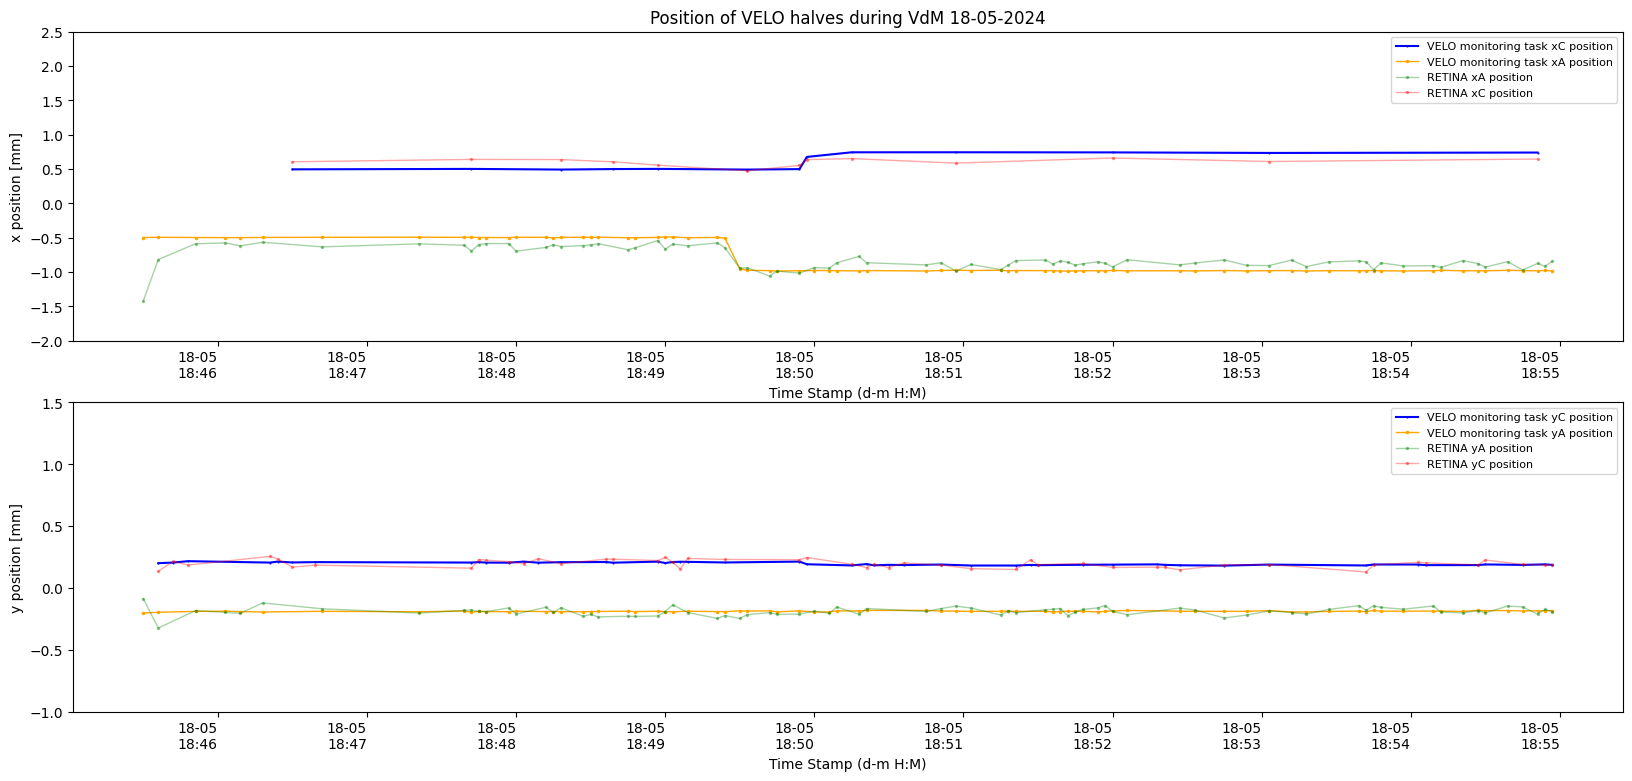

In [183]:
_, axes = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(20, 10))


df_xC_estimate = VeloCx[VeloCx['lumi']>0.3]["xC"]+13.096932514023926#*45.83+13.11
df_yC_estimate = VeloCy[VeloCy['lumi']>0.3]["yC"]+0.13845479113739592#*43.91+0.1228
df_xC_position = VeloCx['xPositionVeloC']
df_yC_position = VeloCy['yPositionVeloC']
df_xA_position = VeloAx['xPositionVeloA']
df_yA_position = VeloAy['yPositionVeloA']
df_zC_position = VeloCz['zPositionVeloC']
df_zA_position = VeloAz['zPositionVeloA']
df_xA_estimate = VeloAx[VeloAx['lumi']>0.3]["xA"]-13.229174052516255#*47.01-12.89
df_yA_estimate = VeloAy[VeloAy['lumi']>0.3]["yA"]+0.025109379318657817#*55.41-0.04312
df_zA_estimate = VeloAz[VeloAz['lumi']>0.3]['zA']
df_zC_estimate = VeloCz[VeloCz['lumi']>0.3]['zC']

#df_mu_display = df_mu["mu"]*0.01
#shift the index of df_y_position 1 hour backwards
#df_y_position.index = df_y_position.index - pd.DateOffset(hours=1)
'''
ax1 = df_position.between_time("14:00","15:00").plot(
        marker=".",
        markersize=1,
        title="",
        xlabel="Time Stamp (H:m)",
        ylabel="luminosity",
        ax=axes[0],
        ylim=[-0.15,0.15]

    )
'''
ax2 = df_xC_position.plot(
        ax=axes[0],
        marker=".",
        markersize=1,
        linestyle="solid",
        ylabel="x position [mm]",
        label="VELO monitoring task xC position",
        title="Position of VELO halves during VdM 18-05-2024",
        color="blue",
        ylim=[-2,2.5],
        #ylim=[-2.,2],
    )


ax4 = df_xA_position.plot(
        ax=axes[0],
        marker=".",
        markersize=3,
        linestyle="solid",
        #alpha=0.65,
        linewidth=1,
        label="VELO monitoring task xA position",
        xlabel="Time Stamp (d-m H:M)",
        #ylim=[-0.2,0.2],
        color="orange",
        ylim=[-2,2.5],
        #ylim=[-.2,.2],
    )

ax6 = df_xA_estimate.plot(
     ax=axes[0],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.35,
        linewidth=1,
        label="RETINA xA position",
        xlabel="Time Stamp (d-m H:M)",
        #ylim=[-0.2,0.2],
        color="green",
        ylim=[-2,2.5],
        #ylim=[-.2,.2],
    )

ax8 = df_xC_estimate.plot(
     ax=axes[0],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.35,
        linewidth=1,
        label="RETINA xC position",
        xlabel="Time Stamp (d-m H:M)",
        #ylim=[-0.2,0.2],
        color="red",
        ylim=[-2,2.5],
        #ylim=[-.2,.2],
    )


ax1 = df_yC_position.plot(
        ax=axes[1],
        marker=".",
        markersize=1,
        linestyle="solid",
        ylabel="y position [mm]",
        label="VELO monitoring task yC position",
        #title="Position of VELO halves during mini-vdm",
        color="blue",
       ylim=[-1,1.5],
    )


ax3 = df_yA_position.plot(
        ax=axes[1],
        marker=".",
        markersize=3,
        linestyle="solid",
        #alpha=0.65,
        linewidth=1,
        label="VELO monitoring task yA position",
        xlabel="Time Stamp (d-m H:M)",
        #ylim=[-0.2,0.2],
        color="orange",
        ylim=[-1,1.5],
        #ylim=[-.2,.2],
    )

ax5 = df_yA_estimate.plot(
     ax=axes[1],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.35,
        linewidth=1,
        label="RETINA yA position",
        xlabel="Time Stamp (d-m H:M)",
        #ylim=[-0.2,0.2],
        color="green",
        ylim=[-1,1.5],
        #ylim=[-.2,.2],
    )

ax7 = df_yC_estimate.plot(
     ax=axes[1],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.35,
        linewidth=1,
        label="RETINA yC position",
        xlabel="Time Stamp (d-m H:M)",
        #ylim=[-0.2,0.2],
        color="red",
        ylim=[-1,1.5],
        #ylim=[-.2,.2],
    )





#ax1.legend(prop={"size": 0}, ncols=10)

ax2.legend(prop={"size": 8})
#ax9.legend(prop={"size": 10})
ax5.legend(prop={"size": 8})
ax4.legend(prop={"size": 8})
xformatter = mdates.DateFormatter('%d-%m\n%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.setp( axes[0].xaxis.get_majorticklabels(), rotation=0 )
plt.gcf().axes[1].xaxis.set_major_formatter(xformatter)
plt.setp( axes[1].xaxis.get_majorticklabels(), rotation=0 )

#plt.ylim(-0.2,0.2)
plt.show()

In [188]:
(y_merge['yPosition']-y_merge['y']).median()

0.0696955853269928

In [189]:
(x_merge['xPosition']-x_merge['x']).median()

0.2827403634867585

In [190]:
_, axes = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(20, 10))


df_x_estimate = x_merge[x_merge['lumi']>0.2]["x"]+0.28818662004950385#*45.83+13.11
df_y_estimate = y_merge[y_merge['lumi']>0.2]["y"]+0.0696955853269928#*43.91+0.1228-0.21
df_x_position = x_merge['xPosition']
df_y_position = y_merge['yPosition']
#df_mu_display = df_mu["mu"]*0.01
#shift the index of df_y_position 1 hour backwards
#df_y_position.index = df_y_position.index - pd.DateOffset(hours=1)
'''
ax1 = df_position.between_time("14:00","15:00").plot(
        marker=".",
        markersize=1,
        title="",
        xlabel="Time Stamp (H:m)",
        ylabel="luminosity",
        ax=axes[0],
        ylim=[-0.15,0.15]

    )
'''
ax2 = df_x_position.plot(
        ax=axes[0],
        marker=".",
        markersize=1,
        linestyle="solid",
        ylabel="x position [mm]",
        label="VELO monitoring task x position",
        title="Position of luminous region during VdM 18-05-2024",
        color="blue",
        ylim=[-1,1],
        #ylim=[-.2,.2],
    )

ax6 = df_x_estimate.plot(
     ax=axes[0],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.35,
        linewidth=1,
        label="RETINA x position",
        xlabel="Time Stamp (d-m H:M)",
        #ylim=[-0.2,0.2],
        color="green",
        ylim=[-1,1],
        #ylim=[-.2,.2],
    )

ax1 = df_y_position.plot(
        ax=axes[1],
        marker=".",
        markersize=1,
        linestyle="solid",
        ylabel="y position [mm]",
        label="VELO monitoring task y position",
        #title="Position of VELO halves during mini-vdm",
        color="blue",
       ylim=[-1,1],
    )


ax5 = df_y_estimate.plot(
     ax=axes[1],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.35,
        linewidth=1,
        label="RETINA y position",
        xlabel="Time Stamp (d-m H:M)",
        #ylim=[-0.2,0.2],
        color="green",
        ylim=[-1,1],
        #ylim=[-.2,.2],
    )



#ax1.legend(prop={"size": 0}, ncols=10)

ax2.legend(prop={"size": 10})
ax6.legend(prop={"size": 10})
ax5.legend(prop={"size": 10})
ax1.legend(prop={"size": 10})

xformatter = mdates.DateFormatter('%d-%m\n%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.setp( axes[0].xaxis.get_majorticklabels(), rotation=0 )
plt.gcf().axes[1].xaxis.set_major_formatter(xformatter)
plt.setp( axes[1].xaxis.get_majorticklabels(), rotation=0 )
#plt.ylim(-0.2,0.2)
plt.show()

In [169]:
VeloAx[['xPositionVeloA','xA']].to_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/VeloAx_vdm_plume.csv')
VeloAy[['yPositionVeloA','yA']].to_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/VeloAy_vdm_plume.csv')
VeloCx[['xPositionVeloC','xC']].to_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/VeloCx_vdm_plume.csv')
VeloCy[['yPositionVeloC','yC']].to_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/VeloCy_vdm_plume.csv')
VeloAz[['zPositionVeloA','zA']].to_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/VeloAz_vdm_plume.csv')
VeloCz[['zPositionVeloC','zC']].to_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/VeloCz_vdm_plume.csv')
x_merge[['xPosition','x']].to_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/x_vdm_plume.csv')
y_merge[['yPosition','y']].to_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/y_vdm_plume.csv')



In [121]:
x_merge_null = x_merge[x_merge['xPosition'].isnull()].between_time("16:00","18:30")

In [120]:
x_merge_null

xPosition      lumi        mu         x         y  \
TS                                                                       
2024-05-18 16:40:03        NaN  1.457360  0.373486  0.042151 -0.085005   
2024-05-18 16:40:06        NaN  1.461765  0.374615  0.019768 -0.059363   
2024-05-18 16:40:09        NaN  1.454956  0.372870  0.034740 -0.083244   
2024-05-18 16:40:18        NaN  1.468687  0.376389  0.068152 -0.028628   
2024-05-18 16:40:30        NaN  1.462980  0.374926  0.031461 -0.055803   
...                        ...       ...       ...       ...       ...   
2024-05-18 23:22:15        NaN  1.436200  0.368063 -0.058001 -0.107519   
2024-05-18 23:22:18        NaN  1.397160  0.358058 -0.022633 -0.151584   
2024-05-18 23:22:24        NaN  1.430902  0.366705 -0.069895 -0.050284   
2024-05-18 23:22:27        NaN  1.438544  0.368664 -0.068162 -0.063261   
2024-05-18 23:22:36        NaN  1.458914  0.373884 -0.049489  0.016759   

                                z        xA        yA         zA        xC  \
TS                                                                           
2024-05-18 16:40:03  33993.012519 -2.017037 -0.246690   3.320857  1.953061   
2024-05-18 16:40:06  34000.223850 -2.079801 -0.194378  12.200781  1.974930   
2024-05-18 16:40:09  34001.765252 -2.047584 -0.205980   7.018268  1.986281   
2024-05-18 16:40:18  34000.343824 -2.078830 -0.134817  14.750131  2.052268   
2024-05-18 16:40:30  33996.480160 -2.062859 -0.164133  11.464396  1.990435   
...                           ...       ...       ...        ...       ...   
2024-05-18 23:22:15  34022.583773 -2.232816 -0.200767  18.268290  1.934019   
2024-05-18 23:22:18  34035.467395 -2.019083 -0.328914  -3.036359  1.808945   
2024-05-18 23:22:24  34028.510156 -2.158961 -0.168972  19.792000  1.847219   
2024-05-18 23:22:27  34049.792412 -2.477400 -0.139773  45.884475  2.151057   
2024-05-18 23:22:36  34013.777440 -2.308487 -0.004319  26.169649  2.038903   

                           yC         zC  
TS                                        
2024-05-18 16:40:03  0.177366 -32.721765  
2024-05-18 16:40:06  0.183349 -27.393122  
2024-05-18 16:40:09  0.145741 -26.833819  
2024-05-18 16:40:18  0.191093 -21.141017  
2024-05-18 16:40:30  0.161306 -30.676177  
...                       ...        ...  
2024-05-18 23:22:15  0.113530 -25.825305  
2024-05-18 23:22:18  0.121040 -34.917833  
2024-05-18 23:22:24  0.165214 -27.701098  
2024-05-18 23:22:27  0.129734 -12.574969  
2024-05-18 23:22:36  0.164765 -23.079588  

[5820 rows x 12 columns]

In [125]:
plt.plot(x_merge_null['lumi'],x_merge_null['x'],linestyle="none",marker=".",markersize=1)

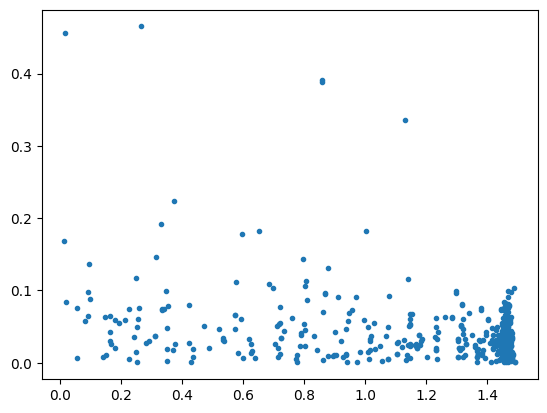

In [112]:
plt.plot(x_nonan['lumi'],(abs(x_nonan['x']))/,marker='.',linestyle='None')

In [ ]:
df.set_index('time',inplace=True)

<Axes: xlabel='time'>

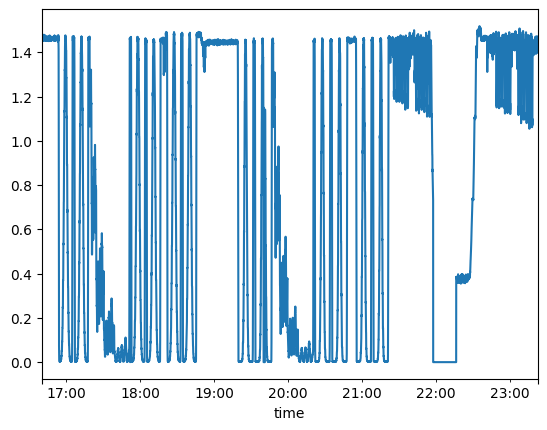

In [ ]:
df['lumi'].plot()

In [ ]:
df_new = df[['x','y','yA','yC']]

In [ ]:
df_new[df['lumi']>0.4].plot()

<Axes: xlabel='time'>

In [ ]:
df_offline = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/beamline/beamline_calibration/calibration_dataset/new_vdm_2024_munorm_side_calib.csv')

In [ ]:
df_offline['TS'] = pd.to_datetime(df_offline['TS'])
df_offline.set_index('TS',inplace=True)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_offline[['1_comp_x','1_comp_y','1_comp_Ay','1_comp_Cy']].between_time('14:40','14:54').plot(ax=ax)
#shift il timestamp di 2 ore
df_new.index = df_new.index - pd.DateOffset(hours=4)

df_new.plot(ax=ax)


<Axes: xlabel='time'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


/var/folders/7t/860dclk54774ltwycrvfp7nc0000gn/T/ipykernel_37901/3606956055.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [35]:
df_counters = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_10084/input_data/data_merged.csv')

In [36]:
df_counters['TS'] = pd.to_datetime(df_counters['TS'])
df_counters.set_index('TS',inplace=True)

In [37]:
#seleziona solo i dati prima del 2024-09-04 18:00
df_counters = df_counters[df_counters.index < '2024-09-04 16:00']
#seleziona solo i dati dopo il 2024-09-03 22:00
df_counters = df_counters[df_counters.index > '2024-09-03 22:00']
#aggiungi offset di 2 ore
df_counters.index = df_counters.index + pd.DateOffset(hours=2)

In [38]:
#seleziona solo colonne che iniziano per M
df_counters = df_counters.filter(regex='^M')

In [39]:
#seleziona solo colonne che finiscono con _outer
df_counters_outer = df_counters.filter(regex='_outer$')
#seleziona solo colonne che finiscono con _inner
df_counters_inner = df_counters.filter(regex='_inner$')



In [44]:
df_counters_outer_median = df_counters_outer.median(axis=1)
df_counters_inner_median = df_counters_inner.median(axis=1)


In [45]:
#dividi ogni valore per il valore mediano
df_counters_outer_norm = df_counters_outer.div(df_counters_outer_median,axis=0)
df_counters_inner_norm = df_counters_inner.div(df_counters_inner_median,axis=0)

<Axes: xlabel='TS'>

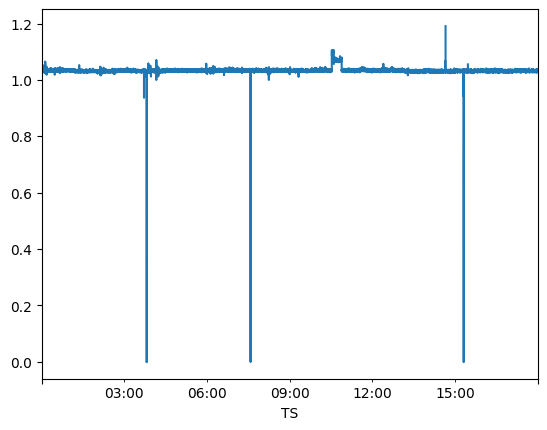

In [62]:
df_counters_inner_norm['M00_1_inner'].plot(legend=False)

In [69]:
df_counters_inner_norm['M00_1_inner'].hist(bins=200,log=True)
plt.axvline(df_counters_inner_norm['M00_1_inner'].median(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_counters_inner_norm['M00_1_inner'].median()*1.1, color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_counters_inner_norm['M00_1_inner'].median()*0.9, color='r', linestyle='dashed', linewidth=1)

In [1]:
df_counters_inner_norm

NameError: name 'df_counters_inner_norm' is not defined

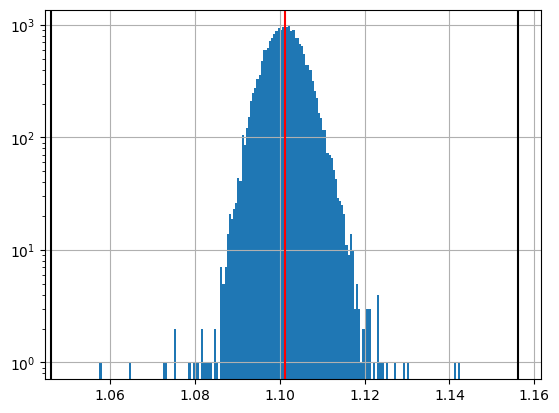

In [67]:
#istogramma con limite sull'asse x
df_counters_outer_norm['M00_1_outer'].hist(bins=200,range=[1.05,1.15],log=True)
#calcola mediana del dataset di sopra e plotta una linea in corrispondenza di essa
df_counters_outer_norm['M00_1_outer'].median()
plt.axvline(df_counters_outer_norm['M00_1_outer'].median(),color='red')
#plotta linee in corrispondenza di +-2% dalla mediana
plt.axvline(df_counters_outer_norm['M00_1_outer'].median()*1.05,color='black')
plt.axvline(df_counters_outer_norm['M00_1_outer'].median()*0.95,color='black')


In [40]:
#prendi la seconfa e la terza lettera del nome della colonna, trasformalo in intero e crea due dataset, uno per quelli dispari e uno per quelli pari
df_counters_outer_even = df_counters_outer[df_counters_outer.columns[df_counters_outer.columns.str[2].astype(int)%2==0]]
df_counters_outer_odd = df_counters_outer[df_counters_outer.columns[df_counters_outer.columns.str[2].astype(int)%2!=0]]
df_counters_inner_even = df_counters_inner[df_counters_inner.columns[df_counters_inner.columns.str[2].astype(int)%2==0]]
df_counters_inner_odd = df_counters_inner[df_counters_inner.columns[df_counters_inner.columns.str[2].astype(int)%2!=0]]

In [41]:
#calcola la mediana di ogni riga in ogni dataframe
df_counters_outer_even_median = df_counters_outer_even.median(axis=1)
df_counters_outer_odd_median= df_counters_outer_odd.median(axis=1)
df_counters_inner_even_median = df_counters_inner_even.median(axis=1)
df_counters_inner_odd_median= df_counters_inner_odd.median(axis=1)

In [42]:
#crea un plot con 4 canvas, asse x condiviso in cui plotti i conteggi esterni e interni, dispari e pari
_, axes = plt.subplots(nrows=4, ncols=1, sharex=False, figsize=(20, 10))

df_counters_outer_even.plot(ax=axes[0],title='Outer counters even',marker='.',markersize=1,legend=False,ylim=[0.,0.11],linestyle='')
df_counters_outer_even_median.plot(ax=axes[0],marker='.',markersize=1,legend=False,ylim=[0.,0.11],linestyle='-',color='black')
df_counters_outer_odd.plot(ax=axes[1],title='Outer counters odd',marker='.',markersize=1,legend=False,ylim=[0.,0.11],linestyle='')
df_counters_outer_odd_median.plot(ax=axes[1],marker='.',markersize=1,legend=False,ylim=[0.,0.11],linestyle='-',color='black')
df_counters_inner_even.plot(ax=axes[2],title='Inner counters even',marker='.',markersize=1,legend=False,ylim=[0.,0.25],linestyle='')
df_counters_inner_even_median.plot(ax=axes[2],marker='.',markersize=1,legend=False,ylim=[0.,0.25],linestyle='-',color='black')
df_counters_inner_odd.plot(ax=axes[3],title='Inner counters odd',marker='.',markersize=1,legend=False,ylim=[0.,0.25],linestyle='')
df_counters_inner_odd_median.plot(ax=axes[3],marker='.',markersize=1,legend=False,ylim=[0.,0.25],linestyle='-',color='black')
#xformatter = mdates.DateFormatter('%d-%m\n%H:%M')
#plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
#plt.setp( axes[0].xaxis.get_majorticklabels(), rotation=0 )
#plt.gcf().axes[1].xaxis.set_major_formatter(xformatter)
#plt.setp( axes[1].xaxis.get_majorticklabels(), rotation=0 )
#plt.ylim(-0.2,0.2)
plt.show()

In [19]:
#del dataframe outers odd separa module id 0 e 1 (5° lettera del nome della colonna)
df_counters_outer_odd_0 = df_counters_outer_odd[df_counters_outer_odd.columns[df_counters_outer_odd.columns.str[4].astype(int)==0]]
df_counters_outer_odd_1 = df_counters_outer_odd[df_counters_outer_odd.columns[df_counters_outer_odd.columns.str[4].astype(int)==1]]

In [20]:
#crea un plot con 4 canvas, asse x condiviso in cui plotti i conteggi esterni e interni, dispari e pari
_, axes = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(20, 10))

df_counters_outer_odd_0.plot(ax=axes[0],title='Outer counters odd sens 0',marker='.',markersize=1,legend=False,ylim=[0.,0.11])
df_counters_outer_odd_1.plot(ax=axes[1],title='Outer counters odd sens 1',marker='.',markersize=1,legend=False,ylim=[0.,0.11])

#xformatter = mdates.DateFormatter('%d-%m\n%H:%M')
#plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
#plt.setp( axes[0].xaxis.get_majorticklabels(), rotation=0 )
#plt.gcf().axes[1].xaxis.set_major_formatter(xformatter)
#plt.setp( axes[1].xaxis.get_majorticklabels(), rotation=0 )
#plt.ylim(-0.2,0.2)
plt.show()

<Axes: title={'center': 'Outer counters even'}>

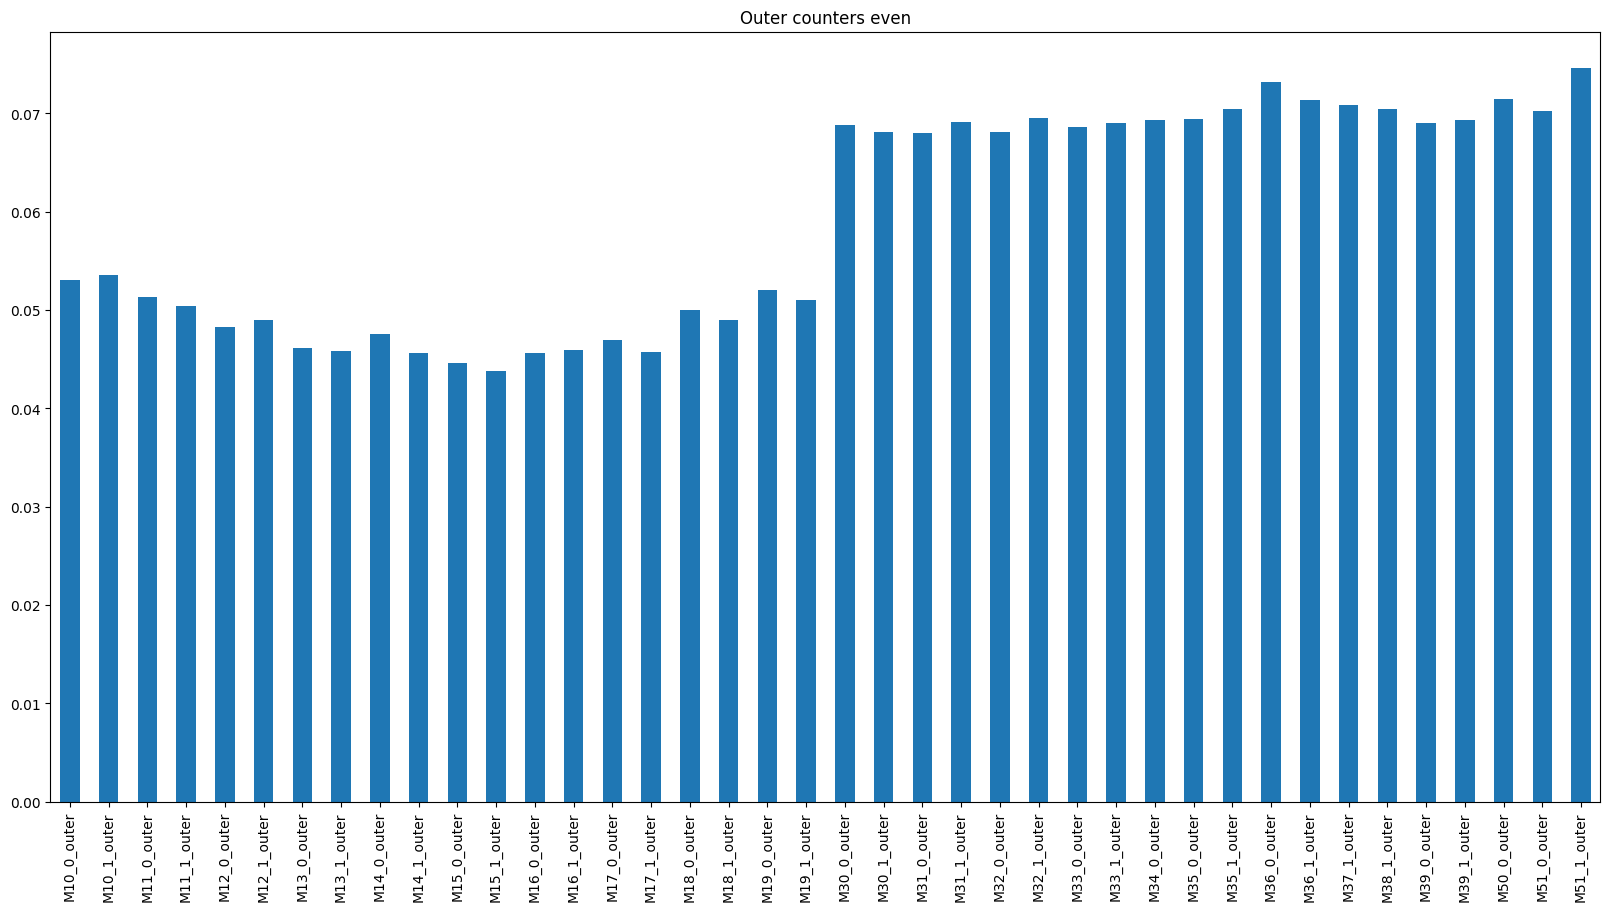

In [24]:
#prendi la prima riga del dataframe e plotta i conteggi esterni e interni in un bar plot
df_counters_outer_odd.iloc[0].plot(kind='bar',title='Outer counters even',legend=False,figsize=(20,10))
